In [ ]:
pip install scikit-learn pandas numpy matplotlib


In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt


In [ ]:
# Generate synthetic data
np.random.seed(42)
normal_data = np.random.normal(0, 1, (30000, 2))
anomaly_data = np.random.normal(5, 1, (3000, 2))

# Combine the data
X = np.vstack((normal_data, anomaly_data))
y = np.hstack((np.zeros(30000), np.ones(3000)))

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Train Isolation Forest model
model = IsolationForest(contamination=0.1, random_state=42)
model.fit(X_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Convert predictions: -1 for anomalies, 1 for normal data
y_pred = np.where(y_pred == -1, 1, 0)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred, target_names=["Normal", "Anomaly"]))


Accuracy: 0.9645454545454546
              precision    recall  f1-score   support

      Normal       0.99      0.97      0.98      9022
     Anomaly       0.77      0.86      0.81       878

    accuracy                           0.96      9900
   macro avg       0.88      0.92      0.90      9900
weighted avg       0.97      0.96      0.97      9900



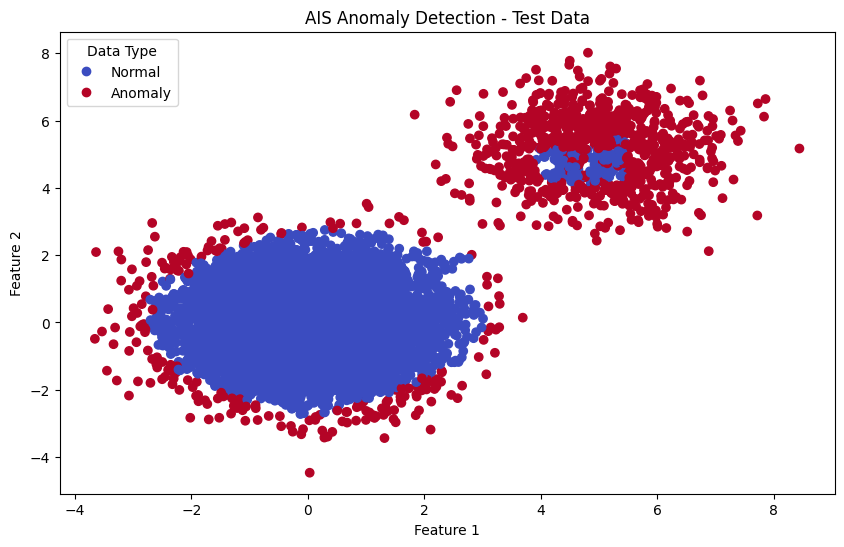

In [ ]:
# Plot the data and anomalies
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='coolwarm')

# Adding a title and labels
plt.title("AIS Anomaly Detection - Test Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")

# Creating a legend
handles, labels = scatter.legend_elements()
legend_labels = ['Normal', 'Anomaly']
plt.legend(handles, legend_labels, title="Data Type")

# Display the plot
plt.show()


In [ ]:
# Simulate new data (including anomalies)
new_normal_data = np.random.normal(0, 1, (200, 2))
new_anomaly_data = np.random.normal(5, 1, (20, 2))
new_X = np.vstack((new_normal_data, new_anomaly_data))
new_y = np.hstack((np.zeros(200), np.ones(20)))

# Combine new data with old data
X_train = np.vstack((X_train, new_X))
y_train = np.hstack((y_train, new_y))

# Retrain the model with new data
model.fit(X_train)

# Predict on the new data
new_y_pred = model.predict(new_X)
new_y_pred = np.where(new_y_pred == -1, 1, 0)

# Evaluate the model
print("Updated Accuracy:", accuracy_score(new_y, new_y_pred))
print(classification_report(new_y, new_y_pred, target_names=["Normal", "Anomaly"]))


Updated Accuracy: 0.9409090909090909
              precision    recall  f1-score   support

      Normal       0.97      0.97      0.97       200
     Anomaly       0.68      0.65      0.67        20

    accuracy                           0.94       220
   macro avg       0.82      0.81      0.82       220
weighted avg       0.94      0.94      0.94       220

